# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Memuat dataset
dataset = pd.read_csv(r'C:\Users\Shinkai\Pictures\SMSML_Yosia-Aser-Camme\Eksperimen_SML_Yosia-Aser-Camme\Air-Quality_raw.csv', sep=';')

In [3]:
# Menampilkan beberapa baris awal dataset untuk memastikan data telah dimuat dengan benar
print(dataset.head())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Menampilkan informasi dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB
None

In [5]:
# Menampilkan statistik deskriptif dataset
print(dataset.describe())

       PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000   
mean   1048.990061  -159.090093     894.595276   168.616971    794.990168   
std     329.832710   139.789093     342.333252   257.433866    321.993552   
min    -200.000000  -200.000000    -200.000000  -200.000000   -200.000000   
25%     921.000000  -200.000000     711.000000    50.000000    637.000000   
50%    1053.000000  -200.000000     895.000000   141.000000    794.000000   
75%    1221.000000  -200.000000    1105.000000   284.000000    960.000000   
max    2040.000000  1189.000000    2214.000000  1479.000000   2683.000000   

           NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  Unnamed: 15  Unnamed: 16  
count  9357.000000   9357.000000  9357.000000          0.0          0.0  
mean     58.148873   1391.479641   975.072032          NaN          NaN  
std     126.940455    467.210125   456.938184          NaN          NaN  
min    -20

In [6]:
# Memeriksa jumlah nilai yang hilang
print(dataset.isnull().sum())

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


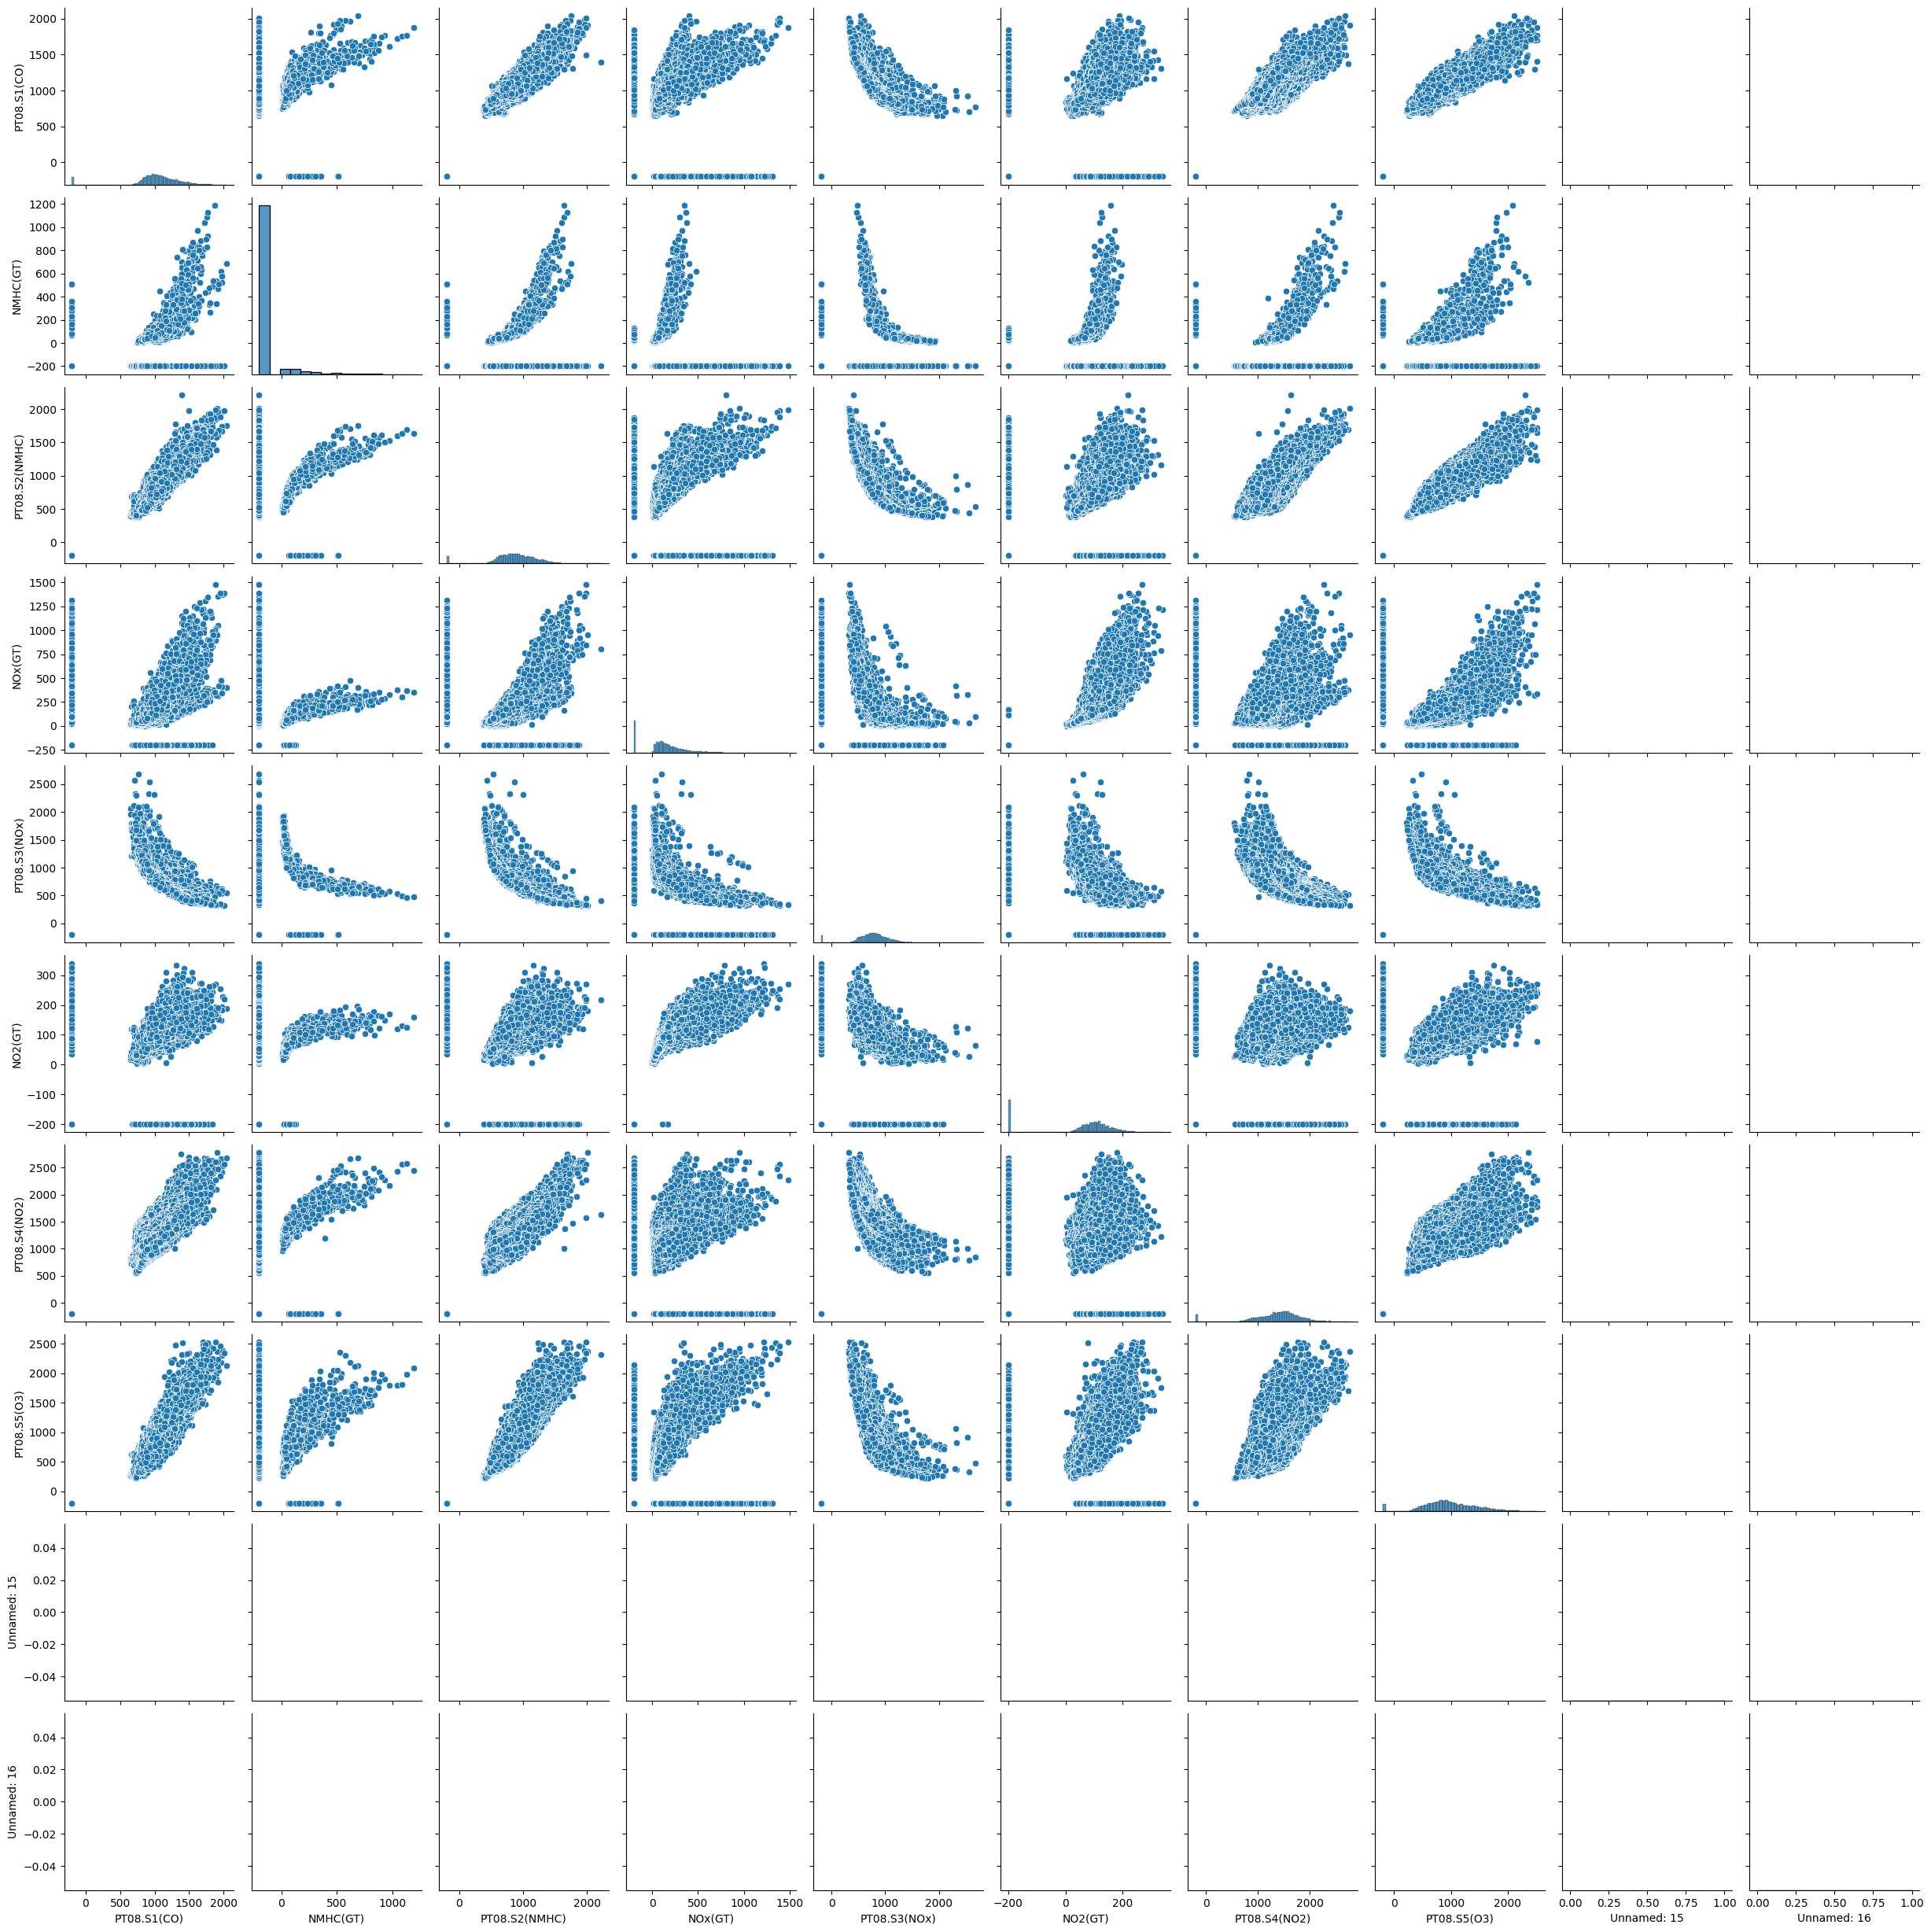

In [7]:
# Visualisasi distribusi data untuk beberapa fitur
sns.pairplot(dataset)
plt.show()

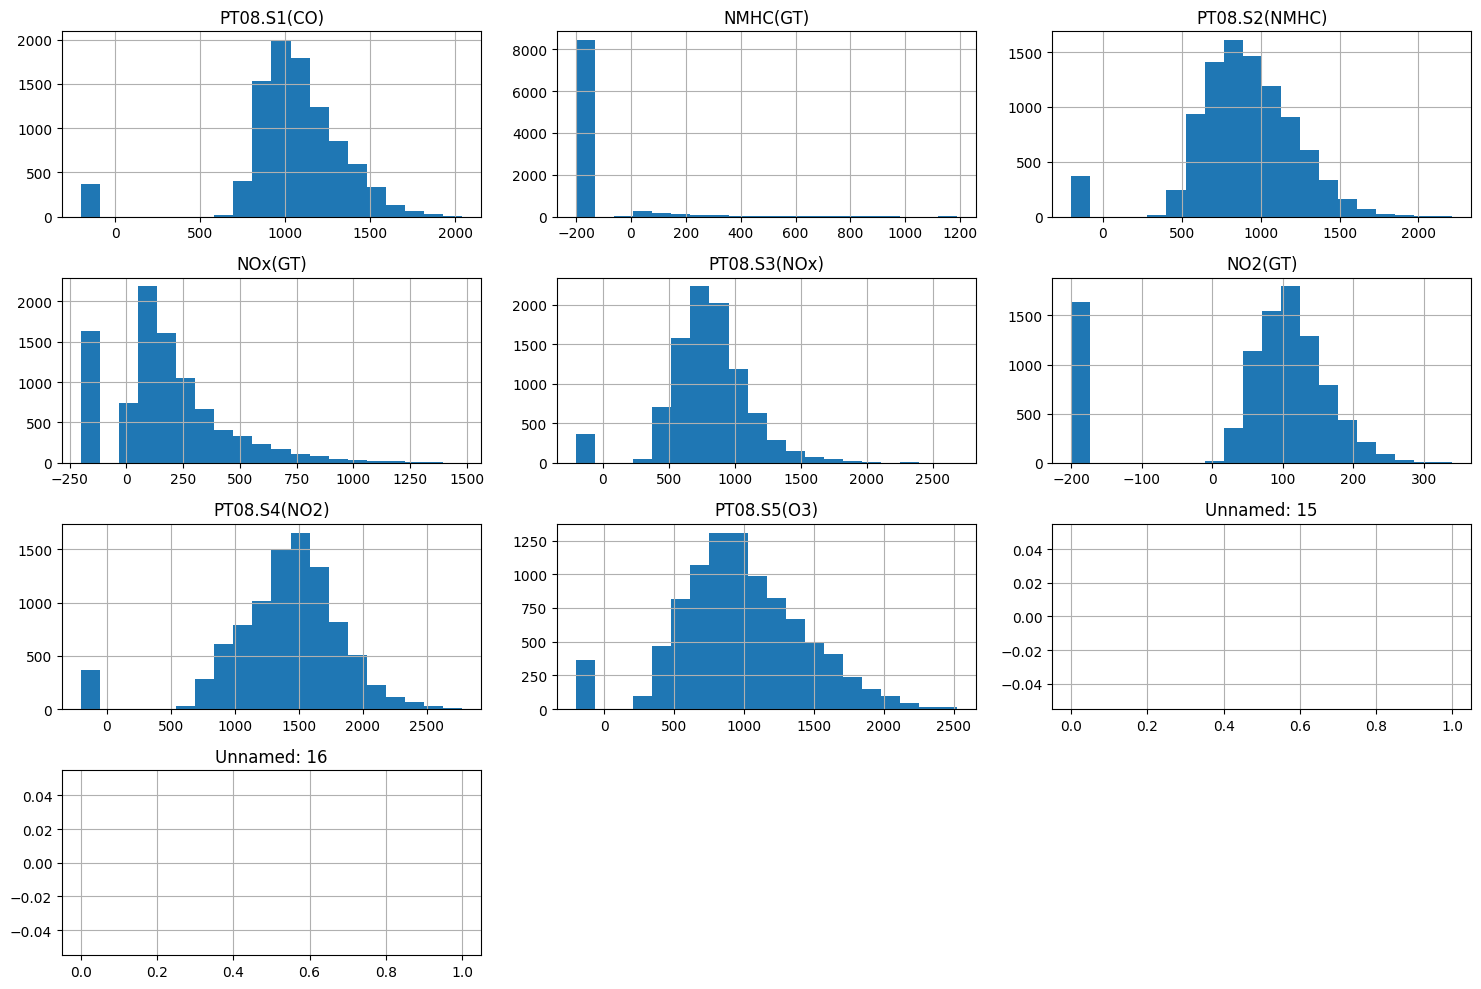

In [8]:
# Menampilkan distribusi nilai pada kolom numerik
dataset.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

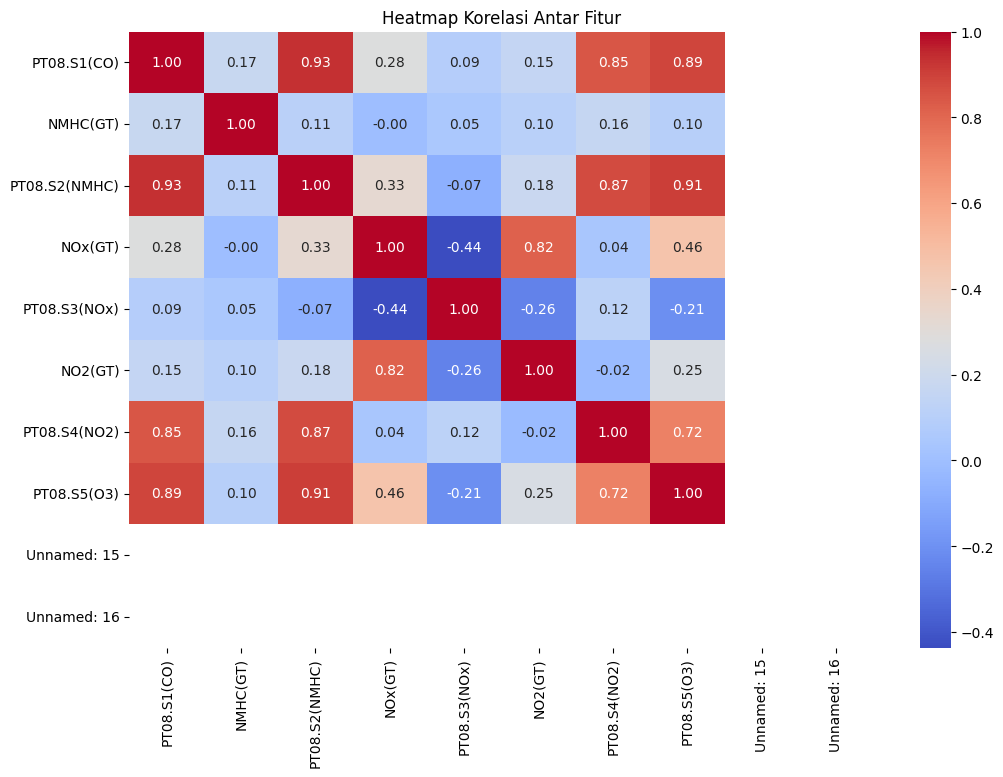

In [9]:
# Menampilkan heatmap korelasi antar fitur numerik
plt.figure(figsize=(12, 8))

# Memilih hanya kolom numerik
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_dataset.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

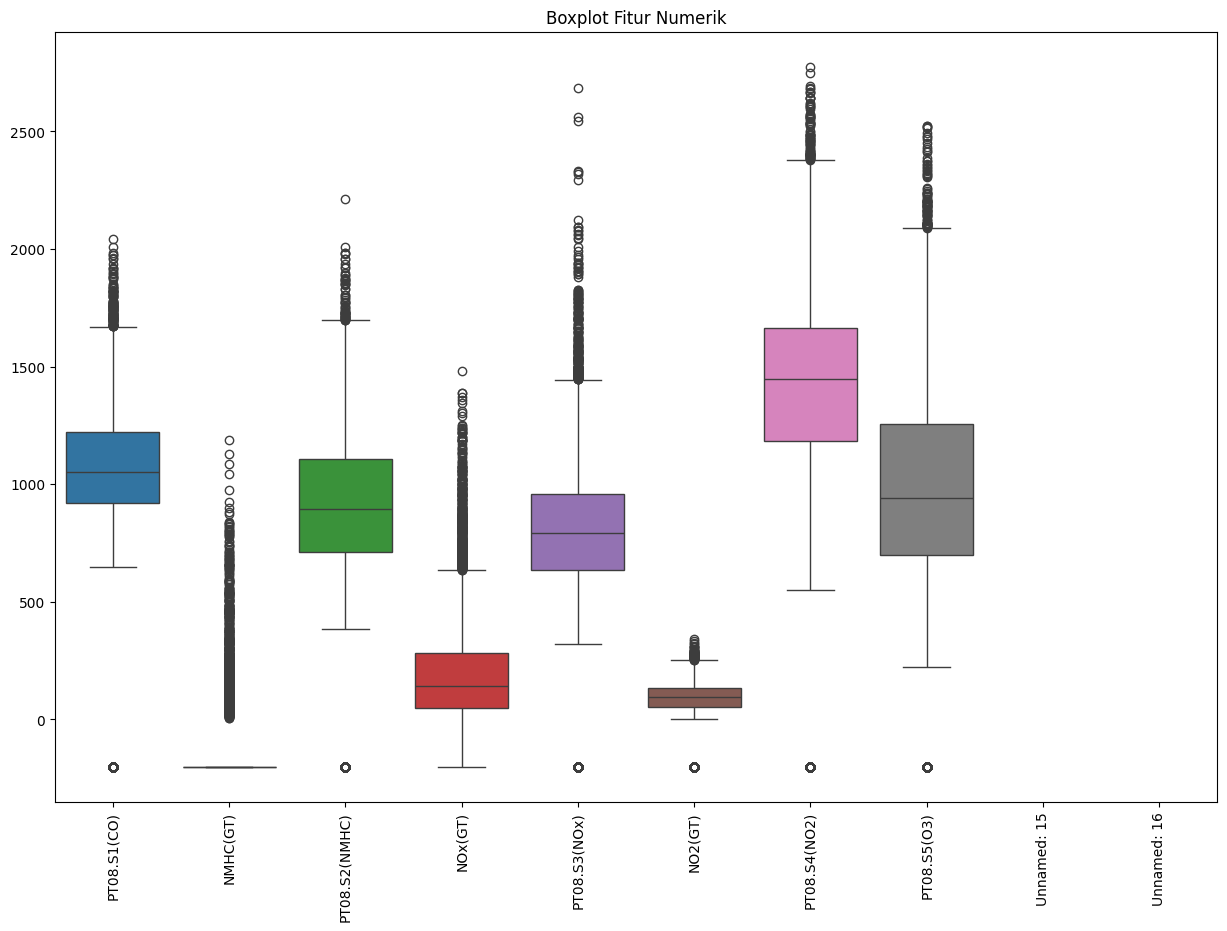

In [10]:
# Menampilkan boxplot untuk mendeteksi outlier pada kolom numerik
plt.figure(figsize=(15, 10))
sns.boxplot(data=dataset.select_dtypes(include=['float64']))
plt.xticks(rotation=90)
plt.title("Boxplot Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# 1. Menghapus atau Menangani Data Kosong (Missing Values)
dataset = dataset.dropna()

In [11]:
# 2. Menghapus Data Duplikat
dataset = dataset.drop_duplicates()

In [12]:
# 3. Normalisasi atau Standarisasi Fitur
scaler = StandardScaler()
numeric_columns = numeric_dataset.columns.drop(['Unnamed: 15', 'Unnamed: 16'])
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

In [13]:
# 4. Deteksi dan Penanganan Outlier
# Menggunakan IQR untuk mendeteksi outlier
Q1 = dataset[numeric_columns].quantile(0.25)
Q3 = dataset[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (dataset[numeric_columns] < (Q1 - 1.5 * IQR)) | (dataset[numeric_columns] > (Q3 + 1.5 * IQR))
dataset = dataset[~outlier_condition.any(axis=1)]

In [14]:
# 5. Encoding Data Kategorikal
# Misalnya, jika ada kolom bernama 'Category'
if 'Category' in dataset.columns:
    dataset['Category'] = dataset['Category'].astype('category').cat.codes

In [16]:
# 6. Binning (Pengelompokan Data)
# Contoh: Membuat binning untuk kolom 'T' (suhu)
if 'T' in dataset.columns:
    # Convert 'T' column to numeric
    dataset['T'] = pd.to_numeric(dataset['T'], errors='coerce')
    
    bins = [-float('inf'), 0, 10, 20, 30, float('inf')]
    labels = ['Very Cold', 'Cold', 'Moderate', 'Warm', 'Hot']
    dataset['Temperature_Binned'] = pd.cut(dataset['T'], bins=bins, labels=labels)

# Menampilkan dataset setelah preprocessing
print(dataset.head())

           Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
184  18/03/2004  10.00.00    4,5     1.722207  -0.29267     21,3   
185  18/03/2004  11.00.00    2,8     1.285599  -0.29267     14,3   
186  18/03/2004  12.00.00    2,2     1.000591  -0.29267     12,5   
187  18/03/2004  13.00.00    2,2     1.018783  -0.29267     12,2   
188  18/03/2004  14.00.00    2,3     1.000591  -0.29267     13,1   

     PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  \
184       1.280706  0.700734     -0.338504  0.723615      1.323930   
185       0.678921  0.215146      0.111840  0.739371      0.771686   
186       0.506565  0.009257      0.323036  0.636956      0.581184   
187       0.471509 -0.076206      0.298189  0.589687      0.549076   
188       0.562069 -0.122822      0.329247  0.534540      0.574762   

     PT08.S5(O3)   T    RH      AH  Unnamed: 15  Unnamed: 16  \
184     1.847018 NaN  40,5  0,8210          NaN          NaN   
185     1.297680 NaN  34,4  0,8365        

In [17]:
# Menyimpan dataset hasil preprocessing
dataset.to_csv(r'C:\Users\Shinkai\Pictures\SMSML_Yosia-Aser-Camme\Eksperimen_SML_Yosia-Aser-Camme\preprocessing\preprocessed_data.csv', index=False)